In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from classy import Class
from scipy.interpolate import interp1d
import subprocess

In [13]:
def data_plotter(a, dcdm, dr):
    plt.figure()
    plt.plot(a, dr, label=r'$\rho_{\mathrm{dr}}^{\mathrm{CLASS}}$')
    plt.plot(a, dcdm, label=r'$\rho_{\mathrm{dcdm}}^{\mathrm{CLASS}}$')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('a')
    plt.ylabel('$\\rho$')
    plt.legend()

In [ ]:
log10z_tr = 4
z_tr = 10**log10z_tr
a_tr = 1 / (1 + z_tr)

common_settings = {'Omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0,'non linear':'halofit'}

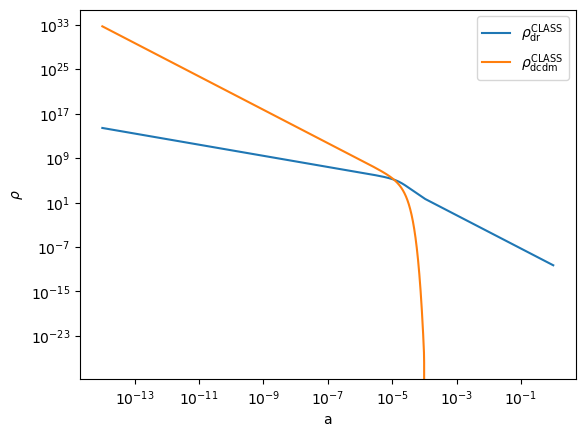

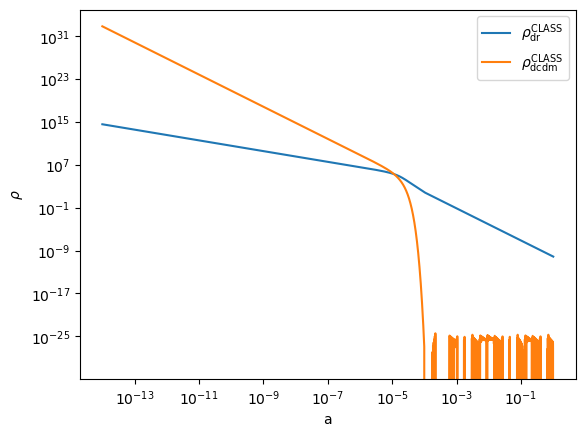

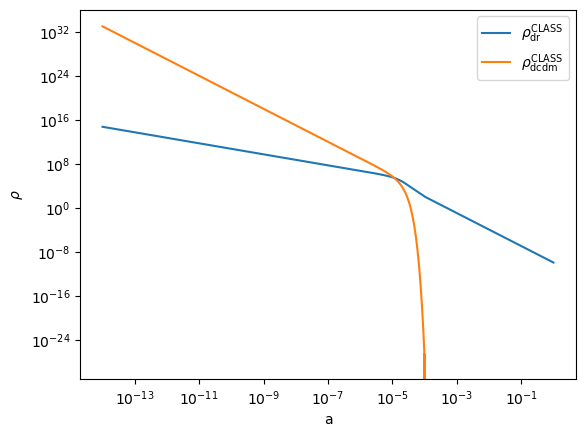

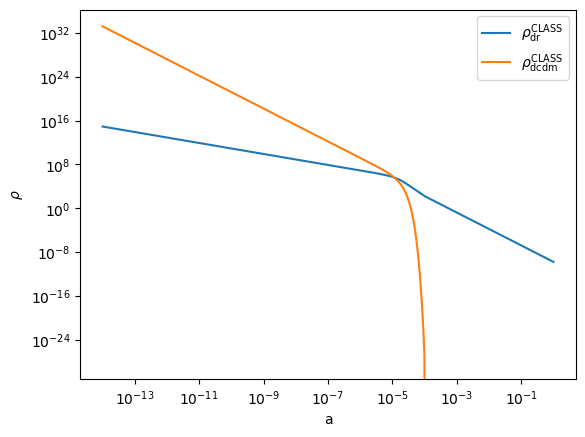

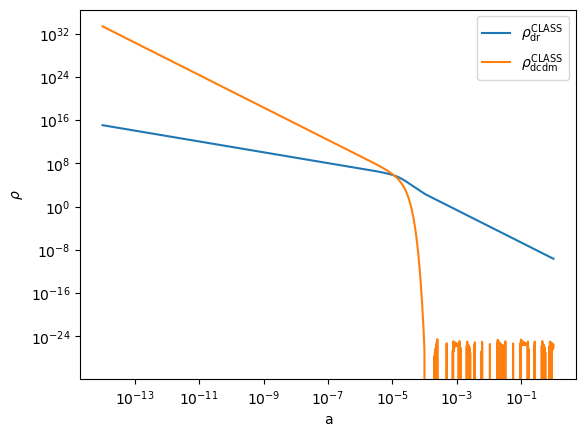

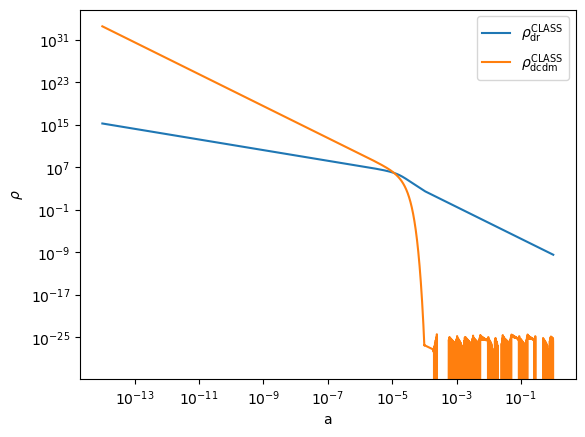

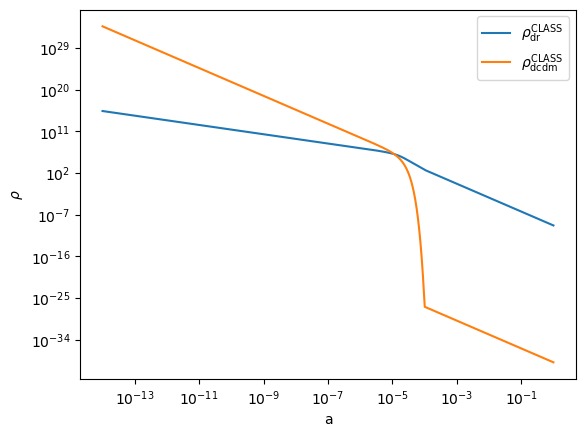

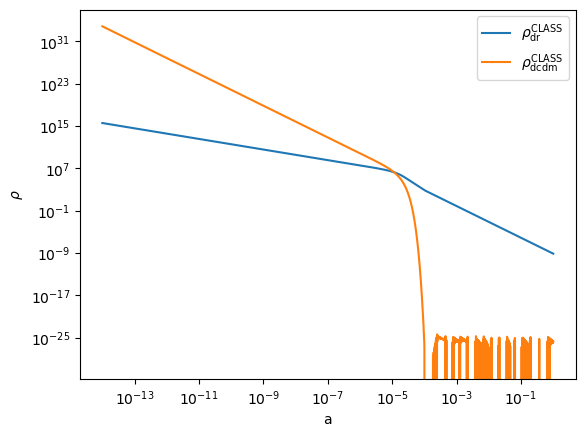

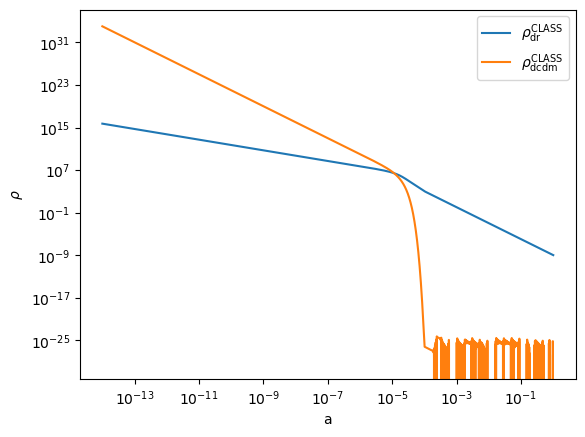

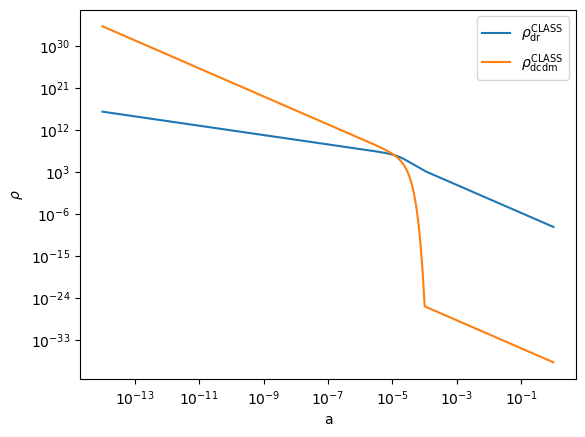

In [17]:
Omega_table = np.logspace(-2, np.log10(0.3), 10, endpoint=True)

for x in Omega_table:
    COFI = Class(common_settings)
    COFI.set({'Omega_ini_dcdm':x, 'Gamma_dcdm': 1e10, 'a_tr': a_tr})
    COFI.compute()

    bak = COFI.get_background()
    z = bak['z']
    a = 1/(1+z)
    rho_dr = bak['(.)rho_dr']
    rho_dcdm = bak['(.)rho_dcdm']
    data_plotter(a, rho_dcdm, rho_dr)

    COFI.struct_cleanup()

In [358]:
dat = open("output.dat", "r")
a_SHK = []
rhoddm = []
rhoCFT = []


while True:
    l = dat.readline()
    if not l:
        break
    loga, rho_ddm, rho_CFT = list(map(float, l.strip().split(',')))
    a_SHK.append(loga)
    rhoddm.append(rho_ddm)
    rhoCFT.append(rho_CFT)
    
a_SHK = np.exp(np.array(a_SHK))
rhoddm = np.exp(np.array(rhoddm))
rhoCFT = np.exp(np.array(rhoCFT))

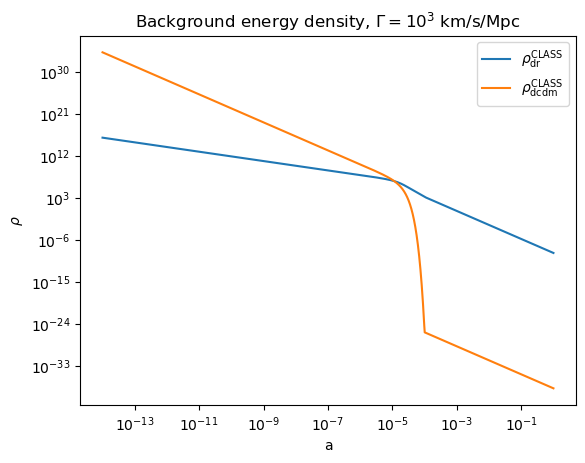

In [8]:
plt.plot(a, rho_dr, label=r'$\rho_{\mathrm{dr}}^{\mathrm{CLASS}}$')
plt.plot(a, rho_dcdm, label=r'$\rho_{\mathrm{dcdm}}^{\mathrm{CLASS}}$')
#plt.plot(a_SHK, rhoCFT, label=r'$\rho_{\mathrm{dr}}^{\mathrm{SHK}}$')
#plt.plot(a_SHK, rhoddm, label=r'$\rho_{\mathrm{dcdm}}^{\mathrm{SHK}}$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
plt.ylabel('$\\rho$')
plt.legend()
plt.title(r'Background energy density, $\Gamma = {10^{3}}$ km/s/Mpc')
#plt.gca().invert_xaxis()
plt.show()

In [ ]:
MSE_dcdm = 0
MSE_dr = 0

for i in range(l):
    MSE_dcdm += (rhodcdm_cub[l] - rho_dcdm[l+1])**2
    MSE_dr += (rhodr_cub[l] - rho_dr[l+1])**2
MSE_dcdm /= l
MSE_dr /= l
MSE_dcdm = np.sqrt(MSE_dcdm)
MSE_dr = np.sqrt(MSE_dr)

In [15]:
Omega_table

array([0.001     , 0.00158328, 0.00250679, 0.00396895, 0.00628397,
       0.00994931, 0.01575257, 0.02494078, 0.03948832, 0.06252118])